# 前言

又一个机器学习可视化库。

> [原文链接](https://mp.weixin.qq.com/s/AgxZLIXiTFITdA-2Ik1z2g) [官网链接](https://scikit-plot.readthedocs.io/en/stable/Quickstart.html)

关于库的学习参考各个库的官方网站。里面有详细的介绍。

Scikit-Plot 库主要有四个模块：

+ 度量模块(Metrics Module)
+ + plot_confusion_matrix
+ + plot_precision_recall
+ + plot_roc
+ + plot_ks_statistic
+ + plot_sihouette: 度量聚类好坏的轮廓系数
+ + plot_calibration_curve: 校准曲线
+ + plot_cumulative_gain: 累计得分
+ + plot_lift_curve
+ 估计模块(Estimators Module)
+ + plot_learning_curve: 学习曲线
+ + plot_feature_importances: 特征重要性
+ 分类模块(Clusterer Module)
+ + plot_elbow_curve: 决定簇个数的肘部曲线
+ 降维模块(Decomposition Module)
+ + plot_pca_component_variance: 可解释方差
+ + plot_pca_2d_projection: 高维投影到二维

本章学习的重要知识点函数：

+ plot_pca_component_varience: 主成分方差是什么
+ plot_pca_2d_projection: 为什么降维
+ plot_pca_confusion_matrix: 混淆矩阵是什么
+ plot_precision_recall: 查准率和查全率是什么
+ plot_roc: ROC 和 AUC 是什么
+ plot_sihouette: 轮廓系数
+ plot_elbow_curve: 肘部方法是什么
+ plot_learning_curve: 学习曲线是什么
+ plot_feature_importances: 特征重要性是什么

具体的详细用法参考一下文档，里面有具体的例子。

# 1 手写数字数据集
## 1.1 数据介绍

本节学习的数据集是 MNIST。

In [1]:
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

seed = 321

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [2]:
print('The size of X_train is ', X_train.shape)

The size of X_train is  (56000, 784)


In [3]:
print('The size of y_train is ', y_train.shape)

The size of y_train is  (56000,)


In [4]:
print('The size of X_test is ', X_test.shape)

The size of X_test is  (14000, 784)


In [5]:
print('The size of y_test is ', y_test.shape)

The size of y_test is  (14000,)


In [6]:
# 正规化处理(参考前面一个章节)
X_train, X_test = X_train/255.0, X_test/255.0

In [7]:
import numpy as np

# 取 y 里不重复的类别个数
n_class = len(np.unique(y))
n_class

10

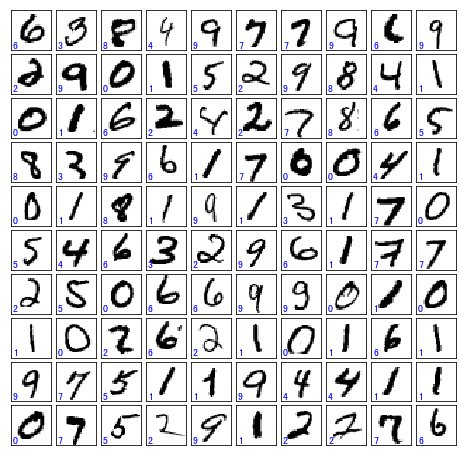

In [8]:
# 查看训练集中前 100 张图片和对应的标签
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10,10,figsize=(8,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28,28), cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05,str(y_train[i]), 
            transform=ax.transAxes, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])

## 1.2 可解释方差

这个时候就需要利用主成分分析来对数据的特征进行降维了，因为 784 个特征较多。

方差越大越具有可解释性(投影的思想)。

![方差](images/variance.webp)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(random_state=seed)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=321,
    svd_solver='auto', tol=0.0, whiten=False)

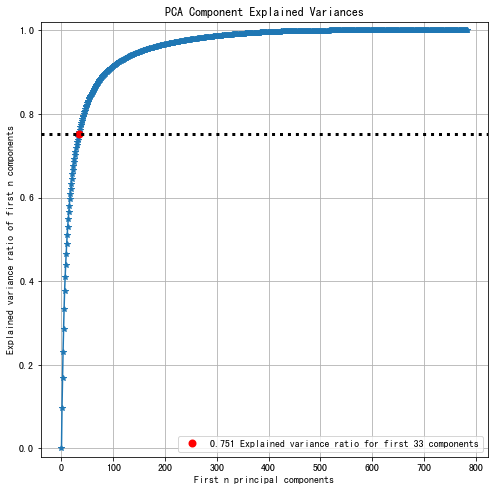

In [10]:
skplt.decomposition.plot_pca_component_variance(pca, target_explained_variance=0.75, figsize=(8,8))
plt.show()

## 1.3 降维投影

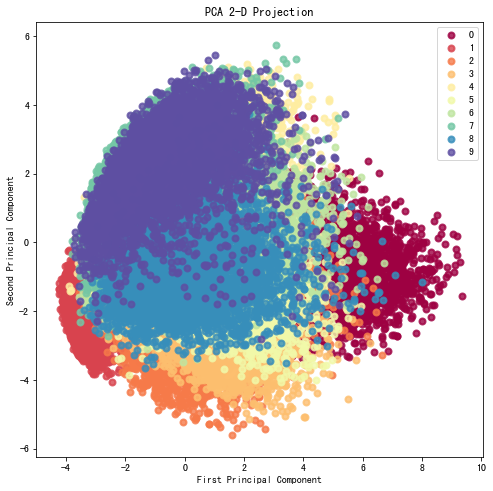

In [11]:
skplt.decomposition.plot_pca_2d_projection(pca, X_train, y_train, figsize=(8,8))
plt.show()

## 1.4 混淆矩阵

In [12]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', n_jobs=-1)
LR.fit(X_train, y_train)

f:\python\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
from sklearn.metrics import accuracy_score

y_pred = LR.predict(X_test)

print('Train accuracy = ' + '{0:6.4}'.format(accuracy_score(y_train, LR.predict(X_train))))

Train accuracy = 0.9365


In [14]:
print('Test accuracy = ' + '{0:6.4}'.format(accuracy_score(y_test,y_pred)))

Test accuracy =  0.925


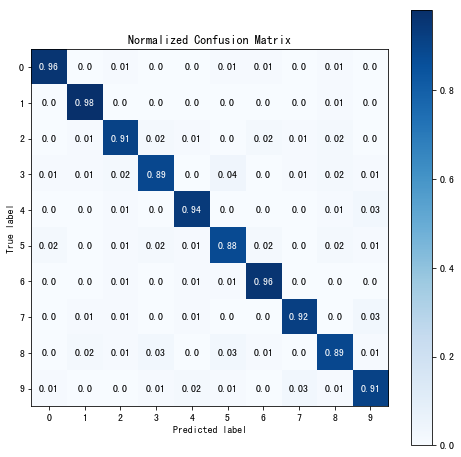

In [15]:
# 混淆矩阵绘制
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True,figsize=(8,8))
plt.show()

## 1.5 查准率和查全率

> precision查准率: "预测出的比赛有多少是赢球"; recall查全率: "赢球的比赛中有多少场被预测出了"

$$查准率 = \frac{真正类}{真正类+假正类}=\frac{正确预测的正类}{所有预测的正类}$$
$$查全率 = \frac{真正类}{真正类+假负类}=\frac{正确预测的正类}{所有真实的正类}$$


![查全率与查准率](images/precision&recall.webp)

查全率和查全率公式计算见原文。

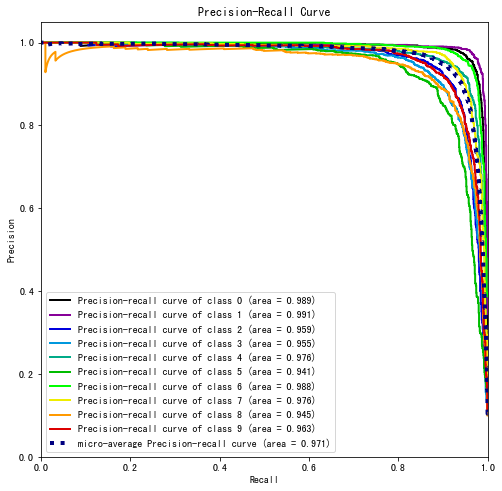

In [16]:
y_prob = LR.predict_proba(X_test)

skplt.metrics.plot_precision_recall(y_test, y_prob, figsize=(8,8))
plt.show()

## 1.6 接受者操作特征曲线

详细解释见原文。

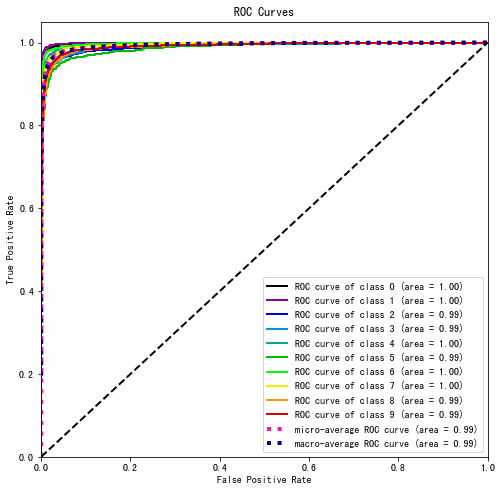

In [18]:
y_prob = LR.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_prob, figsize=(8,8))
plt.show()

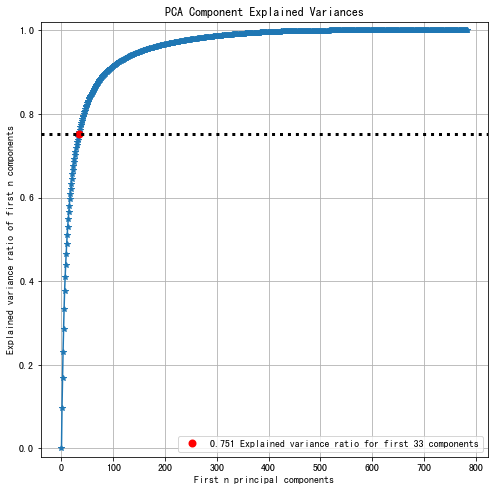

In [19]:
skplt.decomposition.plot_pca_component_variance(pca, target_explained_variance=0.75, figsize=(8,8))
plt.show()

In [20]:
# 33 个主成分解释了 75% 的方差
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=33, random_state=seed)
pca.fit(X_train)
X_train_rd = pca.transform(X_train)
X_test_rd = pca.transform(X_test)

LR_rd = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', n_jobs=-1)
LR_rd.fit(X_train_rd, y_train)

f:\python\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
from sklearn.metrics import accuracy_score

y_pred = LR_rd.predict(X_test_rd)

In [22]:
print('Train accuracy = ' + '{0:6}.4'.format(accuracy_score(y_train,LR_rd.predict(X_train_rd))))

Train accuracy = 0.89725.4


In [23]:
print('Test accuracy = ' + '{0:6.4}'.format(accuracy_score(y_test, y_pred)))

Test accuracy = 0.8984


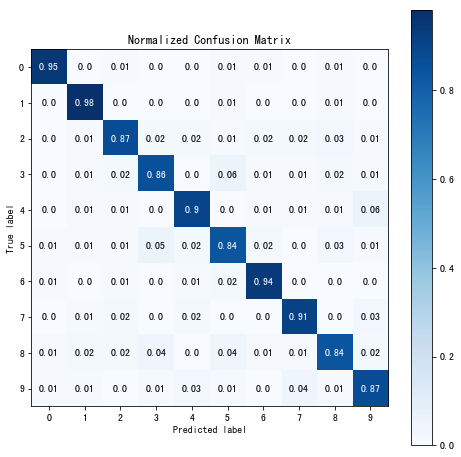

In [24]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True,figsize=(8,8))
plt.show()
# plt.savefig('demo.png')

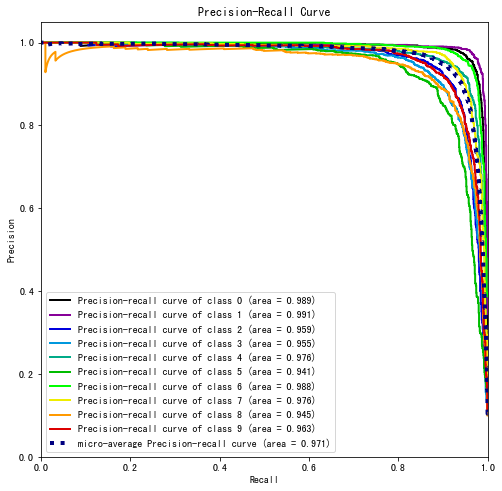

In [25]:
y_prob = LR.predict_proba(X_test)

skplt.metrics.plot_precision_recall(y_test, y_prob, figsize=(8,8))
plt.show()

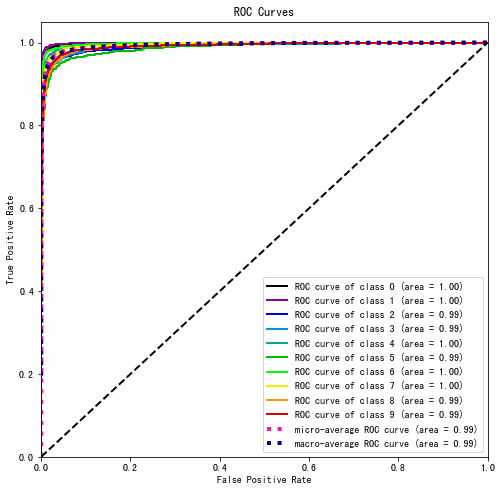

In [26]:
y_prob = LR.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_prob, figsize=(8,8))
plt.show()

# 2 鸢尾花数据集

多元分类问题，共有 150 个样例，数据集包含了 4 个特征和 1 个类变量：

+ 花萼长度(sepal length)
+ 花萼宽度(sepal width)
+ 花瓣长度(petal length)
+ 花瓣宽度(petal width)
+ 类变量: Iris Setosa(山鸢尾), Iris Versicolour(杂色鸢尾), Iris Virginica(为吉尼亚鸢尾)


In [27]:
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris['data'], 
                                                    iris['target'], 
                                                    test_size=0.2, 
                                                    random_state=seed)                                                                     

In [28]:
print('The size of X_train is ', X_train.shape)

The size of X_train is  (120, 4)


In [29]:
print('The size of y_train is ', y_train.shape)

The size of y_train is  (120,)


In [30]:
print('The size of X_train is ', X_train.shape)

The size of X_train is  (120, 4)


In [31]:
print('The size of y_train is ', y_train.shape)

The size of y_train is  (120,)


## 2.2 轮廓系数

轮廓方法(silhousette method) 用来评估聚类的质量好坏:

+ 对象和所属簇之间的相似度, 即内聚性(cohesion)
+ 对象和其他簇之间的相离度, 即分离度(separation)

In [32]:
# KM 估计器
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3, random_state=seed)
cluster_labels = KM.fit_predict(X_train)
print(cluster_labels)

[1 0 2 0 1 2 0 1 2 2 0 0 1 2 2 0 1 0 2 0 0 0 1 2 1 1 0 0 0 2 0 2 0 1 1 1 0
 0 2 1 0 0 0 1 2 1 1 1 0 2 0 1 2 0 0 0 0 0 2 1 0 0 1 2 1 2 2 0 0 1 2 0 0 2
 0 0 2 1 1 0 0 2 2 0 0 2 1 1 1 1 0 2 1 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 1 0 2
 1 0 0 0 1 2 2 1 2]


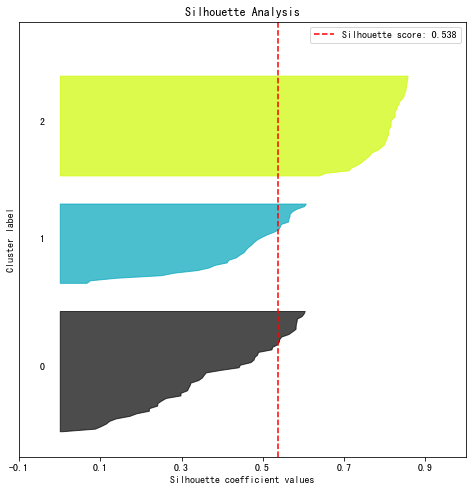

In [33]:
# 轮廓系数函数
skplt.metrics.plot_silhouette(X_train, cluster_labels, figsize=(8,8))
plt.show()

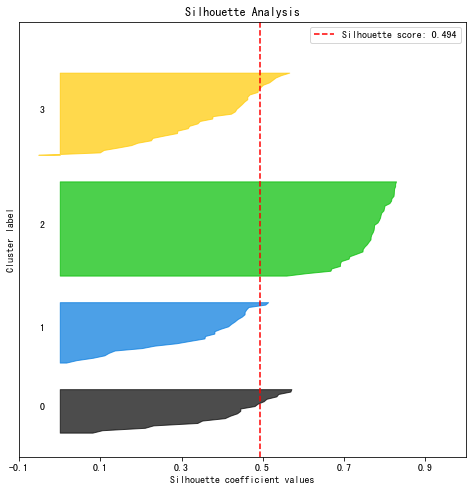

In [34]:
# 分成 4 类的情况
skplt.metrics.plot_silhouette(X_train,
                             KMeans(n_clusters=4, random_state=seed).fit_predict(X_train),
                             figsize=(8,8))
plt.show()

## 2.3 肘部曲线

(应该就是所谓的碎石图)

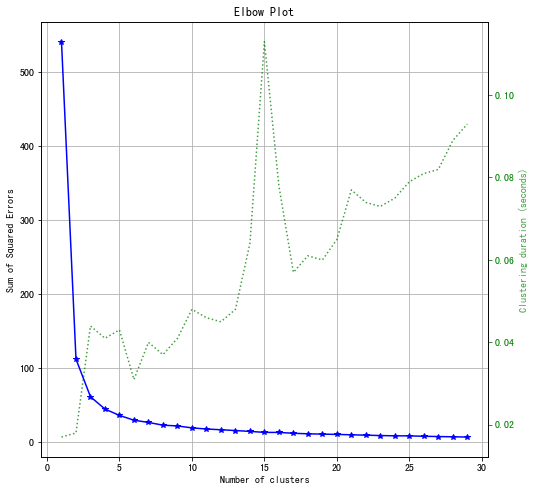

In [35]:
skplt.cluster.plot_elbow_curve(KM, X_train, cluster_ranges=range(1,30), figsize=(8,8))
plt.show()

# 3 乳腺癌数据集

数据集介绍: 二元分类问题，一共有 569 个样例，30 个特征和 1 个类变量。

|特征|描述|
|-|-|
|mean radius|平均半径|
|mean texture|平均纹理|
|mean area|平均面积|
|mean perimeter|平均周长|
|mean smoothness|平均柔滑度|
|mean compactness|平均紧密性|
|mean concavity|平均凹陷度|
|mean concave points|平均凹点|
|mean symmetry|平均对称度|
|mean fractal dimension|平均分形维数|
|radius error|半径误差|
|texture error|纹理误差|
|perimeter error|周长误差|
|area error|面积误差|
|smoothness error|润滑度误差|
|compactness error|紧致性误差|
|concavity error|凹陷度误差|
|concave points error|凹陷点误差|
|symmetry error|对称性误差|
|fractal dimension error|分形维数误差|
|worst radius|最坏的半径|
|worst texture|最坏的纹理|
|worst perimeter|最坏的周长|
|worst area|最坏的面积|
|worst smoothness|最坏的紧致度|
|worst concavity|最坏的凹陷度|
|worst concave points|最坏的凹陷点|
|worst symmetry|最坏的对称度|
|worst fractal dimension|最坏的分形维数|
|类变量|M=恶性肿瘤，B=良性肿瘤|

In [36]:
# 载入数据集
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = \
train_test_split(breast_cancer['data'],breast_cancer['target'],
                 test_size=0.2, random_state=seed)

In [37]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [38]:
print('The size of X_train is ', X_train.shape)

The size of X_train is  (455, 30)


In [39]:
print('The size of y_train is ', y_train.shape)

The size of y_train is  (455,)


In [40]:
print('The size of X_test is ',X_test.shape)

The size of X_test is  (114, 30)


In [41]:
print('The size of y_test is ',y_test.shape)

The size of y_test is  (114,)


X=(样本数, 特征数)，y=(样本数,)

## 3.2 学习曲线

利用 Scikit-Plot 中 plot_learning_curve 函数绘制不同样本下的训练精度和交叉验证精度(学习曲线)

In [42]:
# 随机森林分类模型
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=5,
                           random_state=seed,
                           n_jobs=-1) # n_jobs 内核 -1 表示使用电脑的所有内核

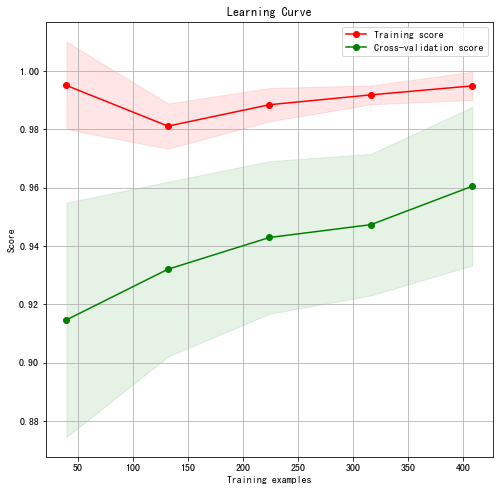

In [43]:
skplt.estimators.plot_learning_curve(RF, X_train, y_train, cv=10, figsize=(8,8))
plt.show()

## 3.3 特征重要性

In [44]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=321, verbose=0,
                       warm_start=False)

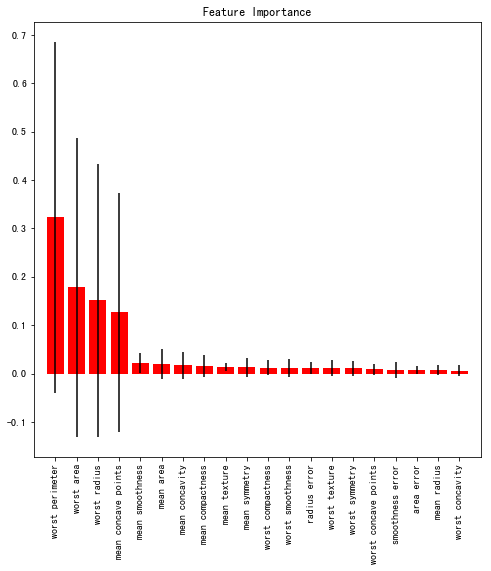

In [45]:
skplt.estimators.plot_feature_importances(RF,feature_names=breast_cancer['feature_names'],
                                         x_tick_rotation=90, figsize=(8,8))
plt.show()

# 4 Scikit-Plot VS Matplotlib 

## 4.1 plot_pca_component_variance

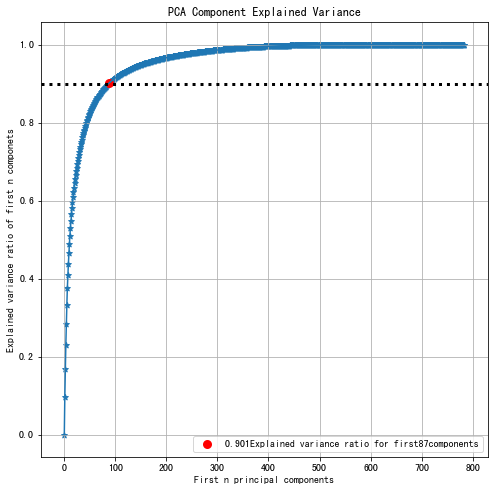

In [46]:
import numpy as np

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
seed = 321

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# 正规化处理(参考前面一个章节)
X_train, X_test = X_train/255.0, X_test/255.0

pca = PCA(random_state=seed)
pca.fit(X_train)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

x_pt = np.arange(pca.n_features_+1)
y_pt = np.hstack((0, np.cumsum(pca.explained_variance_ratio_)))

ax.plot(x_pt, y_pt, '-')
ax.scatter(x_pt, y_pt, marker='*')

target_explained_variance=0.9
ax.axhline(y=target_explained_variance, color='black', linestyle=':',lw=3)

idx = np.where(y_pt > target_explained_variance)[0][0]
ax.scatter(idx, y_pt[idx], marker='o', color='r', lw=3,
          label='{0:5.3}'.format(y_pt[idx]) + 'Explained variance ratio for first'+str(idx)+'components')

ax.grid()
ax.legend(loc='lower right')
ax.set_xlabel('First n principal components')
ax.set_ylabel('Explained variance ratio of first n componets')
ax.set_title('PCA Component Explained Variance')
plt.show()

# 先跳过上面代码，显示的错误是维数不一致，不知道怎么回事

## 4.2 plot_pca_2d_projection

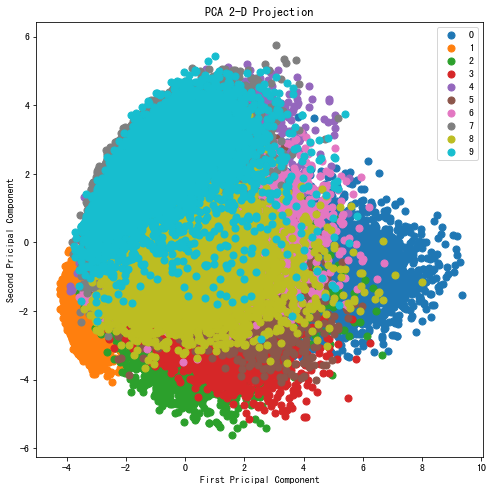

In [47]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

pca = PCA(n_components=2, random_state=seed)
X_reduced = pca.fit_transform(X_train)

groups = [str(i) for i in range(n_class)]

for group in groups:
    ax.scatter(X_reduced[y_train==group,0], X_reduced[y_train==group,1],
              cmap='Spectral', s=50, label=group)
    
ax.legend(loc=0)
ax.set_xlabel('First Pricipal Component')
ax.set_ylabel('Second Pricipal Component')
ax.set_title('PCA 2-D Projection')
plt.show()

## 4.3 plot_confusion_matrix

In [48]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1346    0   11    7    3   21   10    2   10    1]
 [   0 1520    7    3    1   11    2    4    9    0]
 [   5   16 1193   28   22   12   29   22   37    9]
 [   5    8   33 1203    1   78    8   14   29   12]
 [   3    8   11    0 1257    0   19    9   12   78]
 [  10    9   15   57   24 1052   27    6   37   17]
 [   9    4   17    2   15   27 1323    2    5    1]
 [   4   15   22    3   23    6    0 1289    7   42]
 [   8   24   23   60    5   55   12    7 1161   23]
 [  17   11    7   13   45   19    2   64   12 1233]]


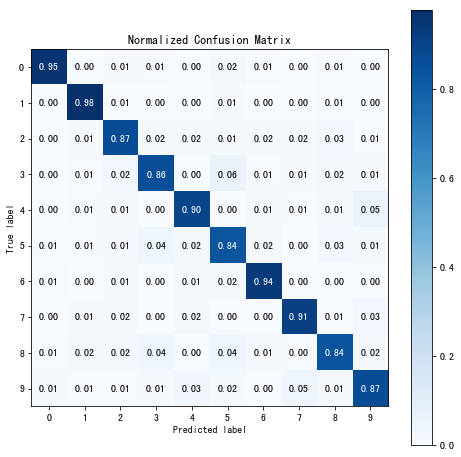

In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

norm_cm = cm.astype('float') / cm.sum(axis=1)

im = ax.imshow(norm_cm, cmap=plt.cm.Blues, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)

label = [str(i) for i in range(n_class)]

ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(label)
ax.set_yticklabels(label)

thresh = norm_cm.max() / 2 # 阈值

for i in range(norm_cm.shape[0]):
    for j in range(norm_cm.shape[1]):
        ax.text(j, i, format(norm_cm[i, j], '.2f'), ha='center', va='center',
               color='white' if norm_cm[i, j] > thresh else 'black')

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Normalized Confusion Matrix')
plt.show()

## 4.4 plot_precision_recall

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import OneHotEncoder

precision = dict()
recall = dict()
average_precision = dict()

y_test_OHE = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).toarray()

for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test_OHE[:,i], y_prob[:,i])
    average_precision[i] = average_precision_score(y_test_OHE, y_prob, average='micro')
    
precision['micro'], recall['micro'], _ = precision_recall_curve(y_test_OHE.ravel(), y_prob.ravel())
average_precision['micro'] = average_precision_score(y_test_OHE, y_prob, average='micro')

f:\python\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


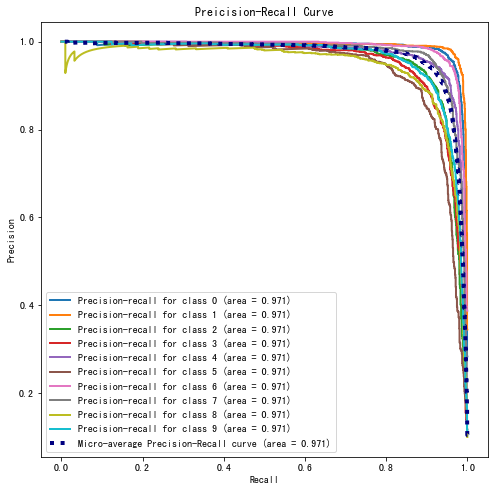

In [51]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

for i in range(n_class):
    ax.plot(recall[i], precision[i], linestyle='-',lw=2,
           label='Precision-recall for class {0} (area = {1:5.3f})'.format(i,average_precision[i]))

ax.plot(recall['micro'], precision['micro'], linestyle=':', lw=4, color='navy',
       label='Micro-average Precision-Recall curve (area = {0:5.3f})'.format(average_precision['micro']))

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Preicision-Recall Curve')
plt.legend()
plt.show()

## 4.5 plot_roc

In [52]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

FPR = dict()
TPR = dict()
AUC = dict()

y_test_OHE = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).toarray()

for i in range(n_class):
    FPR[i], TPR[i], _ = roc_curve(y_test_OHE[:,i], y_prob[:,i])
    AUC[i] = auc(FPR[i], TPR[i])
    
# 计算
FPR['micro'], TPR['micro'], _ = roc_curve(y_test_OHE.ravel(), y_prob.ravel())
AUC['micro'] = auc(FPR['micro'], TPR['micro'])

all_FPR = np.unique(np.concatenate([FPR[i] for i in range(n_class)]))

mean_TPR = np.zeros_like(all_FPR)
for i in range(n_class):
    mean_TPR += interp(all_FPR, FPR[i], TPR[i])
    
# 平均
mean_TPR /= n_class

FPR['macro'] = all_FPR
TPR['macro'] = mean_TPR
AUC['macro'] = auc(FPR['macro'], TPR['macro'])

f:\python\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


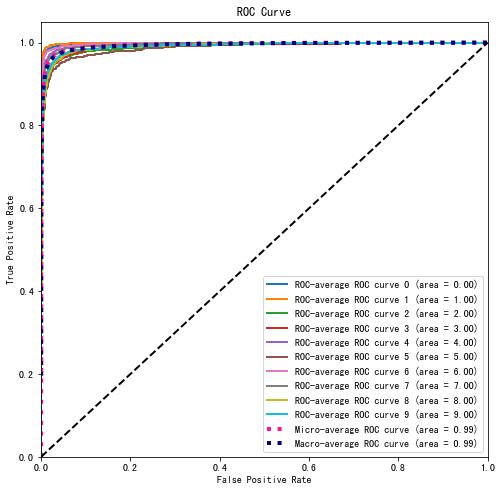

In [53]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

for i in range(n_class):
    ax.plot(FPR[i], TPR[i], linestyle='-', lw=2,
           label='ROC-average ROC curve {0} (area = {0:4.2f})'.format(i,AUC[i]))

ax.plot(FPR['micro'], TPR['micro'],linestyle=':', lw=4, color='deeppink',
       label='Micro-average ROC curve (area = {0:4.2f})'.format(AUC['micro']))

ax.plot(FPR['macro'], TPR['macro'], linestyle=':', lw=4, color='navy',
       label='Macro-average ROC curve (area = {0:4.2f})'.format(AUC['macro']))

ax.plot([0,1],[0,1], 'k--', lw=2)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')

ax.set_xlim(0,1)
ax.set_ylim(0,ax.get_ylim()[1])

plt.legend()
plt.show()

## 4.6 plot_silhouette

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = 3
KM = KMeans(n_clusters=n_clusters, random_state=seed)
cluster_labels = KM.fit_predict(X_train)

mean_score = silhouette_score(X_train, cluster_labels, metric='euclidean')
individual_score = silhouette_samples(X_train, cluster_labels, metric='euclidean')

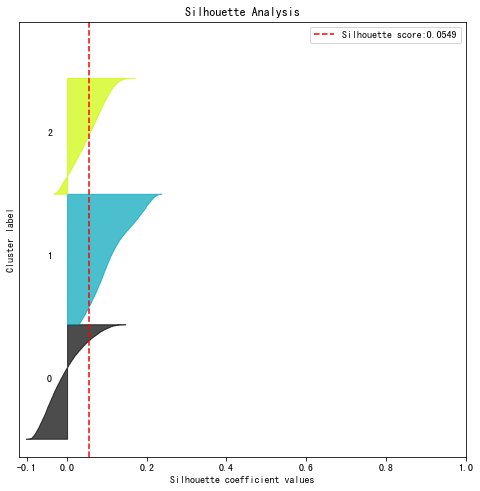

In [55]:
import matplotlib as mpl

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = individual_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = mpl.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
    
ax.set_xlabel('Silhouette coefficient values')
ax.set_ylabel('Cluster label')
ax.set_title('Silhouette Analysis')

ax.axvline(x=mean_score, color='red', linestyle='--',
          label='Silhouette score:' + '{0:5.3}'.format(mean_score))

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.1)
ax.set_yticks([])
ax.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
ax.legend(loc='upper right')

plt.show()

# emmm, 这是什么情况?

## 4.7 plot_elbow_curve

In [57]:
import time

cluster_ranges = range(1,30)
sum_sq_error = []
duration = [] # 持续时间

for c in cluster_ranges:
    start_time = time.time()
    model = KMeans(n_clusters=c, random_state=seed)
    model.fit(X_train)
    sum_sq_error.append(model.inertia_) # 获取距离平方和
    duration.append(time.time() - start_time)

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (29,) and (27,)

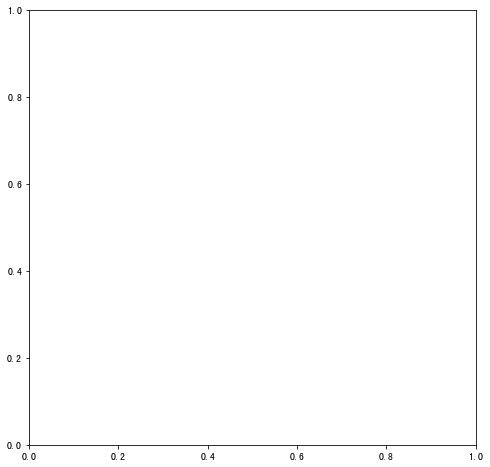

In [58]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.plot(cluster_ranges, sum_sq_error, '*-', color='blue')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Sum of Square Errors')
ax.set_title('Elbow Plot')
ax.grid()

ax2 = ax.twinx()

ax2.plot(cluster_ranges, duration, color='green', linestyle=':')
ax2.set_ylabel('Clustering duration (seconds)', color='green')
plt.setp(ax2.get_yticklabels(), color='green')

plt.show()

## 4.8 plot_learning_curve

In [59]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, cv_scores = learning_curve(RF, X_train, y_train, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
cv_scores_mean = np.mean(cv_scores, axis=1)
cv_scores_std = np.std(cv_scores, axis=1)

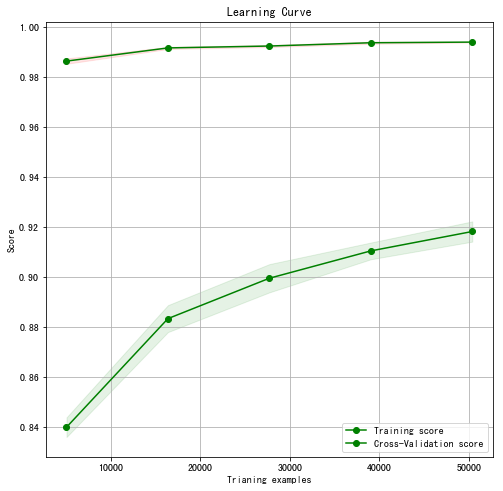

In [61]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.fill_between(train_sizes, train_scores_mean-train_scores_std,
               train_scores_mean+train_scores_std, alpha=0.1, color='red')
ax.fill_between(train_sizes, cv_scores_mean-cv_scores_std,
               cv_scores_mean+cv_scores_std, alpha=0.1, color='green')
ax.plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
ax.plot(train_sizes, cv_scores_mean, 'o-', color='green', label='Cross-Validation score')

ax.legend(loc='best')

ax.set_xlabel('Trianing examples')
ax.set_ylabel('Score')
ax.set_title('Learning Curve')
ax.grid()

plt.show()

## 4.9 plot_feature_importrance

In [62]:
importances = RF.feature_importances_
nonzero_idx = np.nonzero(importances)

importances = importances[nonzero_idx]

std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
std = std[nonzero_idx]

features = breast_cancer['feature_names']
features = features[nonzero_idx]

idx = np.argsort(importances)[::-1]

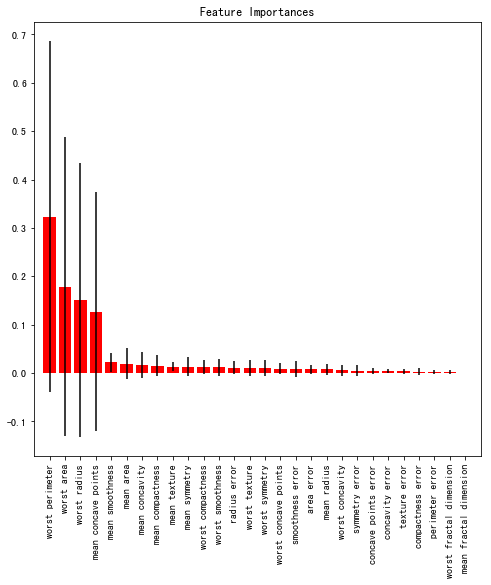

In [64]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(idx)), importances[idx], color='r', yerr=std[idx], align='center')

ax.set_title('Feature Importances')
ax.set_xticks(range(len(idx)))
ax.set_xticklabels(features[idx], rotation=90)
ax.set_xlim([-1, len(idx)])

plt.show()

# 5 总结

matlotlib 复现代码太多了吧。

next:
+ TensorFlow: 《Hands on Machine Learning》Aurélien Géron
+ Keras: 《Deep Learning in Python》Francois Chollet
+ PyToch: 《Natural Language Processing in PyTorch》
+ MXNet: 《Dive into Deep Learning》李牧.